In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import openmensa

In [2]:
pd.plotting.register_matplotlib_converters()
sns.set(style="darkgrid")

In [3]:
meals = openmensa.load_csvs("*.csv")
meals.tail()

,mensa_id,date,meal_id,name,category,price_student,notes
32076,Mo's Diner,2020-02-05,4893797,Kürbisragout mit Vollkornreis und Rucola,Menü II vegetarisch,3.15,['Sesam']
32077,Mo's Diner,2020-02-06,4893798,Rindfleischpfanne Chili con Carne,Menü I,3.15,"['Milch', 'glutenhaltiges Getreide', 'Sellerie..."
32078,Mo's Diner,2020-02-06,4894395,Süßkartoffeltaschen mit Frischkäsefüllung dazu...,Menü II vegetarisch,3.10,"['Milch', 'glutenhaltiges Getreide', 'Sellerie..."
32079,Mo's Diner,2020-02-07,4893800,Hausgemachte Frikadelle mit Kartoffelpüree und...,Menü I,3.25,"['Rind/Kalb', 'glutenhaltiges Getreide', 'mit ..."
32080,Mo's Diner,2020-02-07,4893801,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.45,"['Milch', 'glutenhaltiges Getreide', 'Eier']"


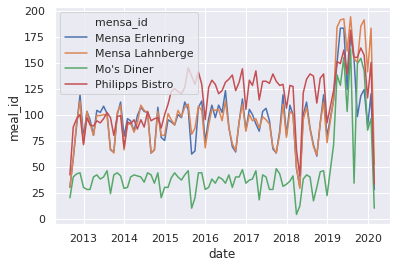

In [4]:
overview = meals.groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview)

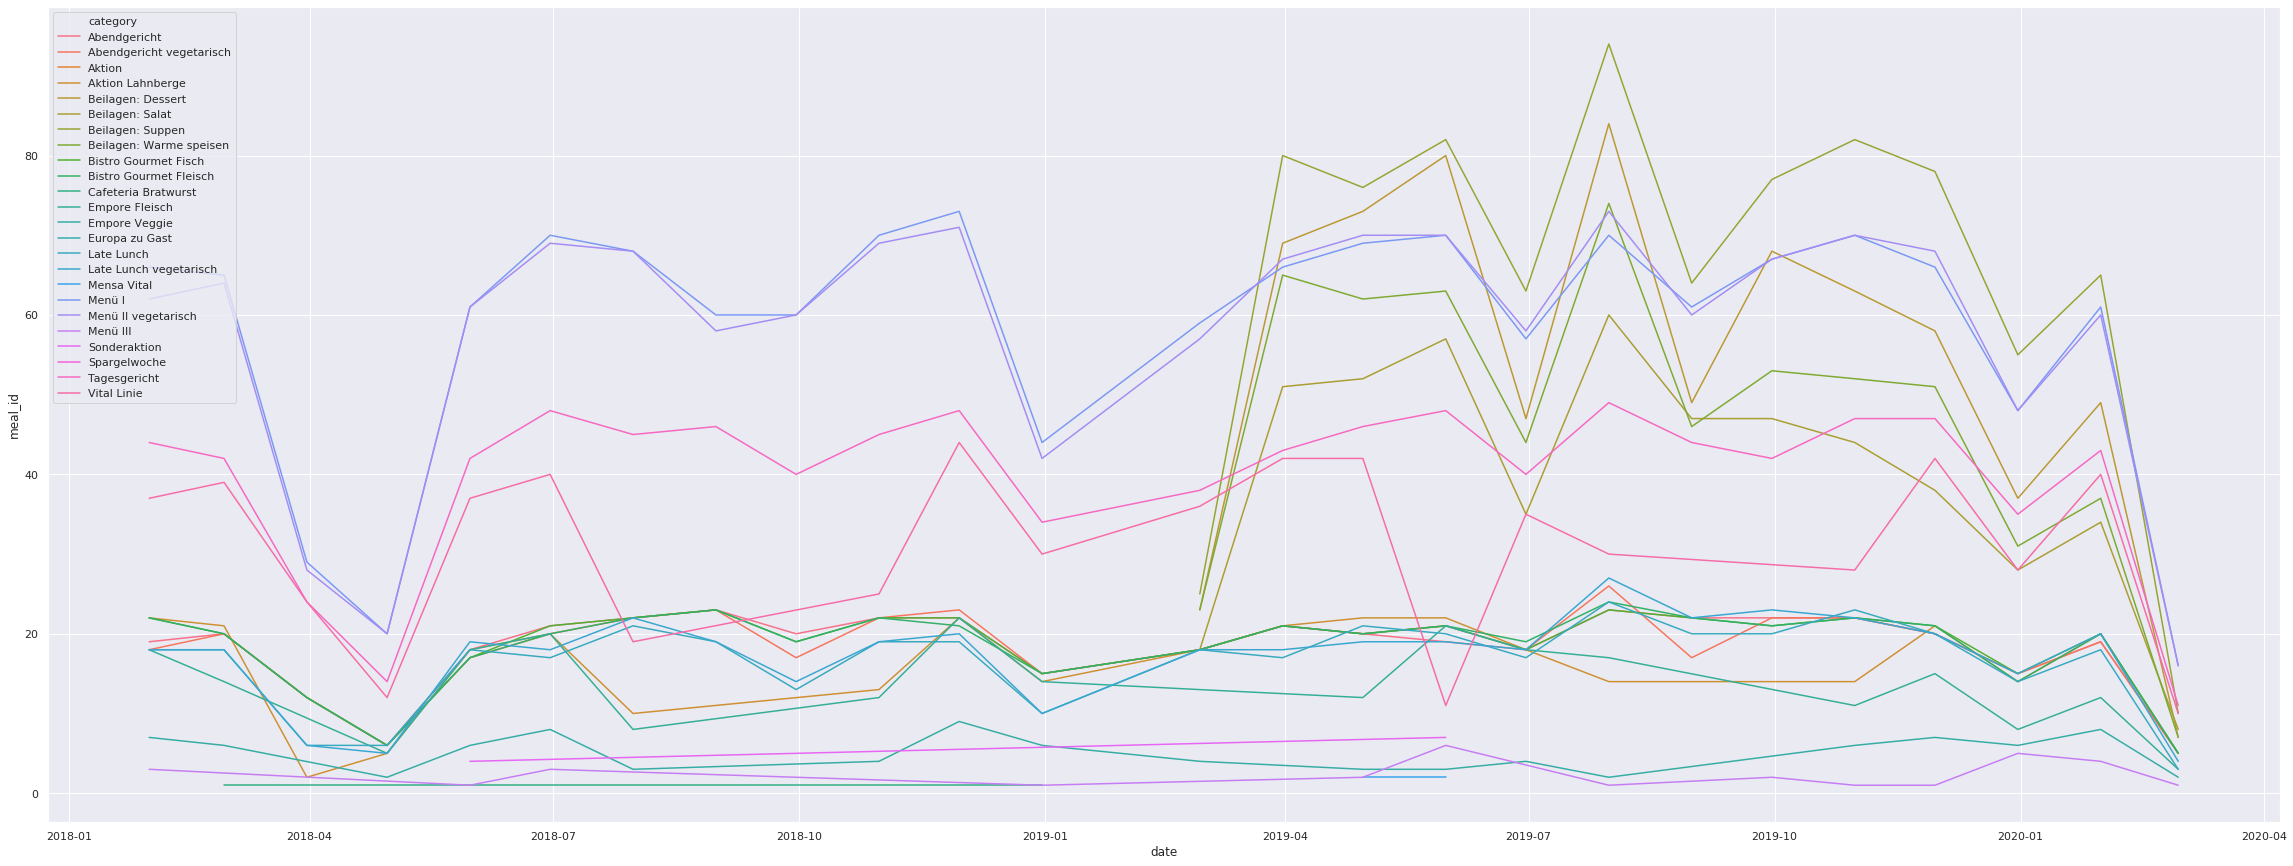

In [5]:
overview_cat = meals[meals.date >= "2018-01-01"].groupby(
    ["category", pd.Grouper(key="date", freq="1M")]).count()["meal_id"].reset_index()

plt.figure(figsize=(40, 15))
sns.lineplot(x="date", y="meal_id", hue="category", data=overview_cat)

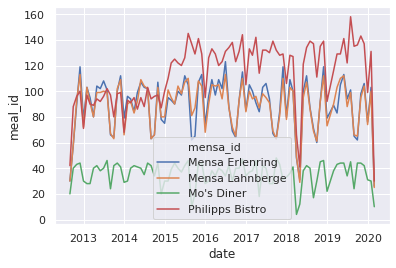

In [6]:
overview_side = meals[~meals.category.str.contains("Beilagen")].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="M")]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview_side)

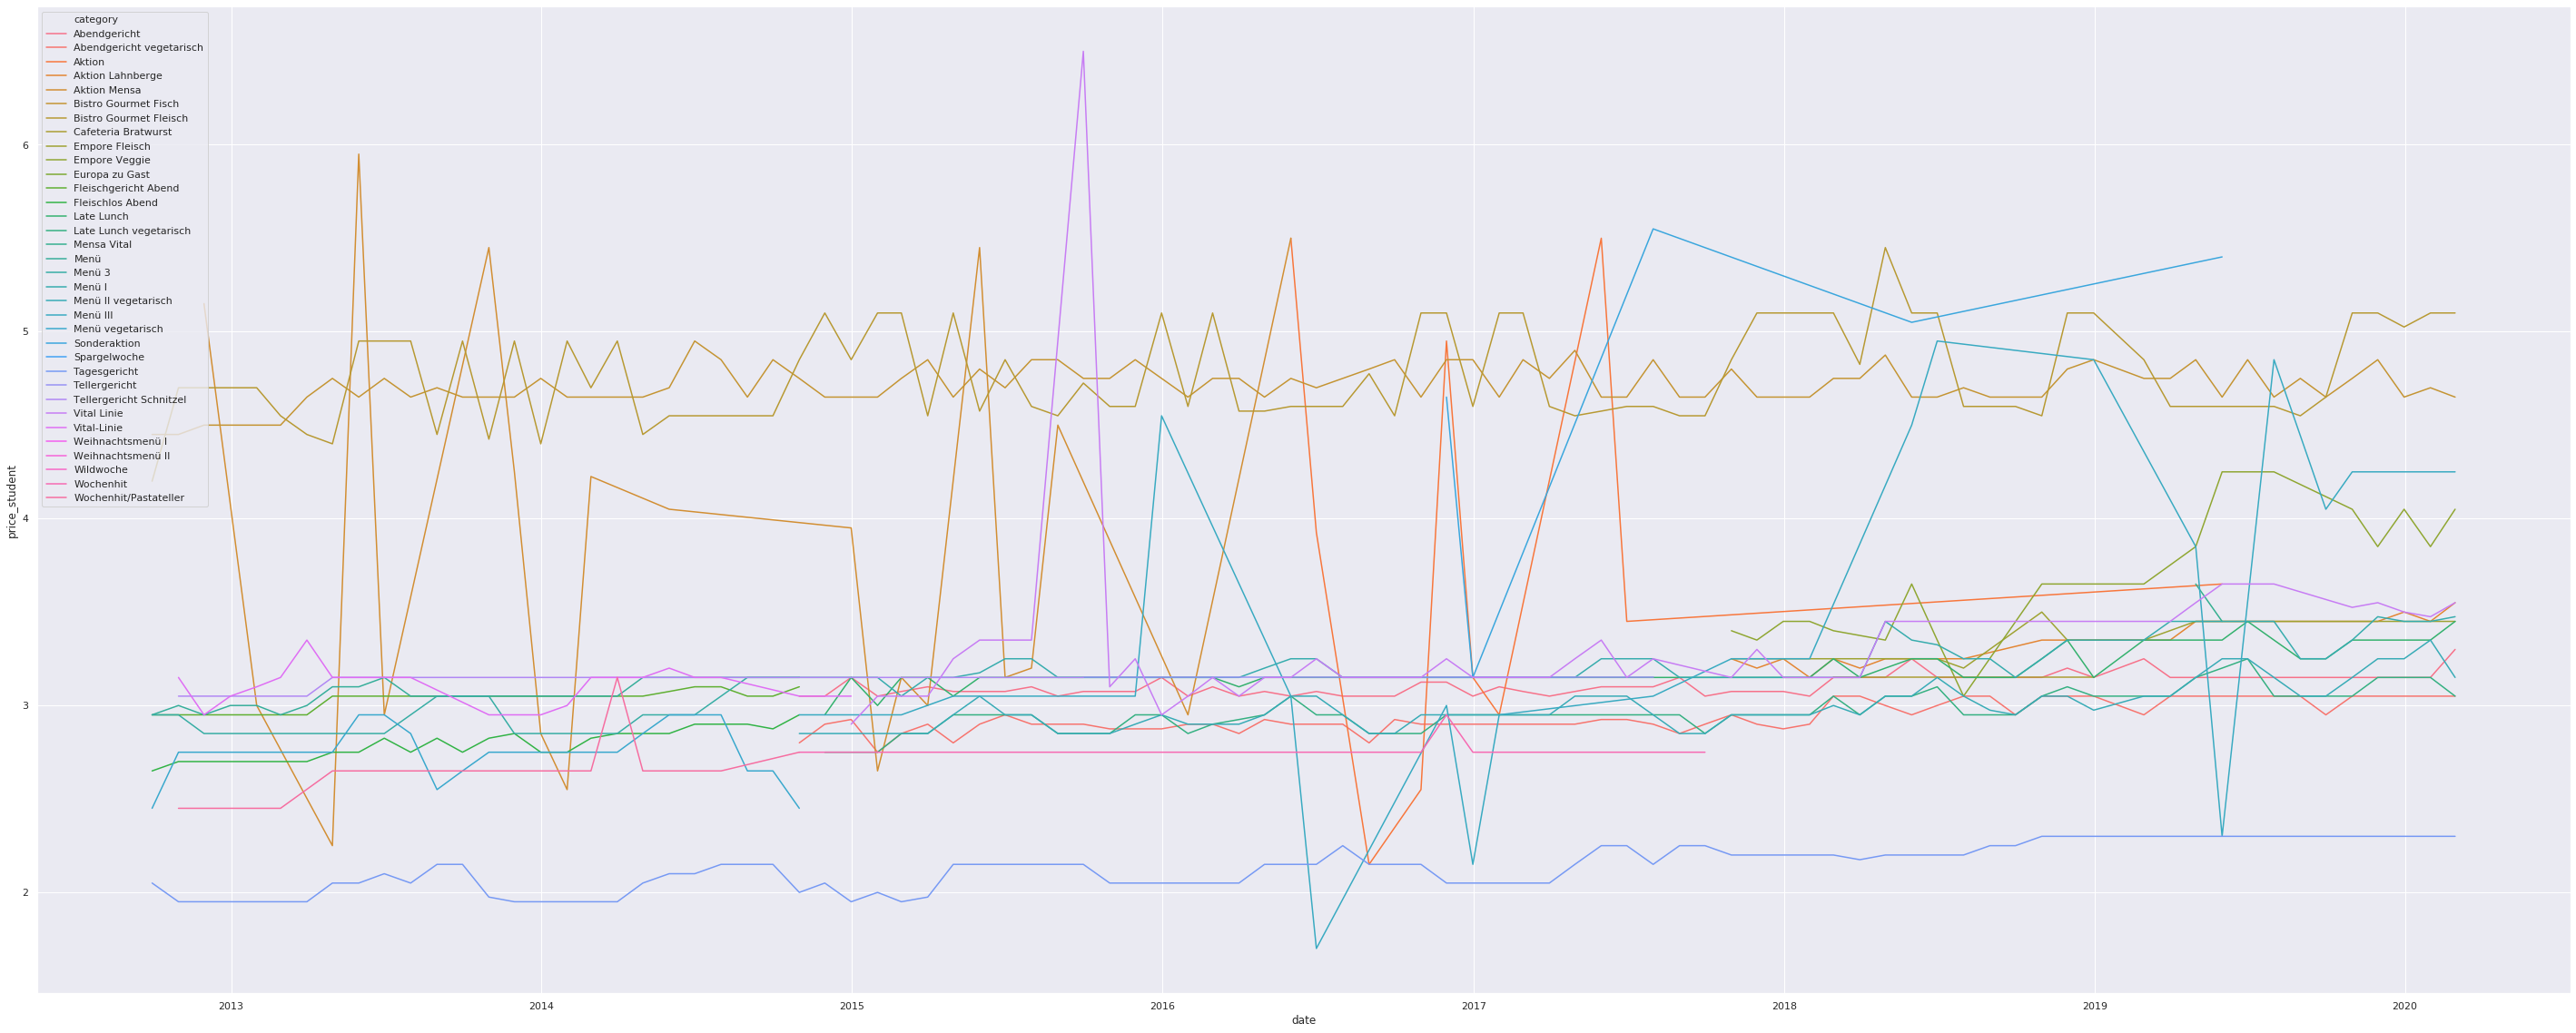

In [31]:
# ignore elements without a price and the golden Hetax-Käse for EUR 295
meals_cat = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["category", pd.Grouper(key="date", freq="M")])["price_student"].median().reset_index()

plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_student", hue="category", data=meals_cat)

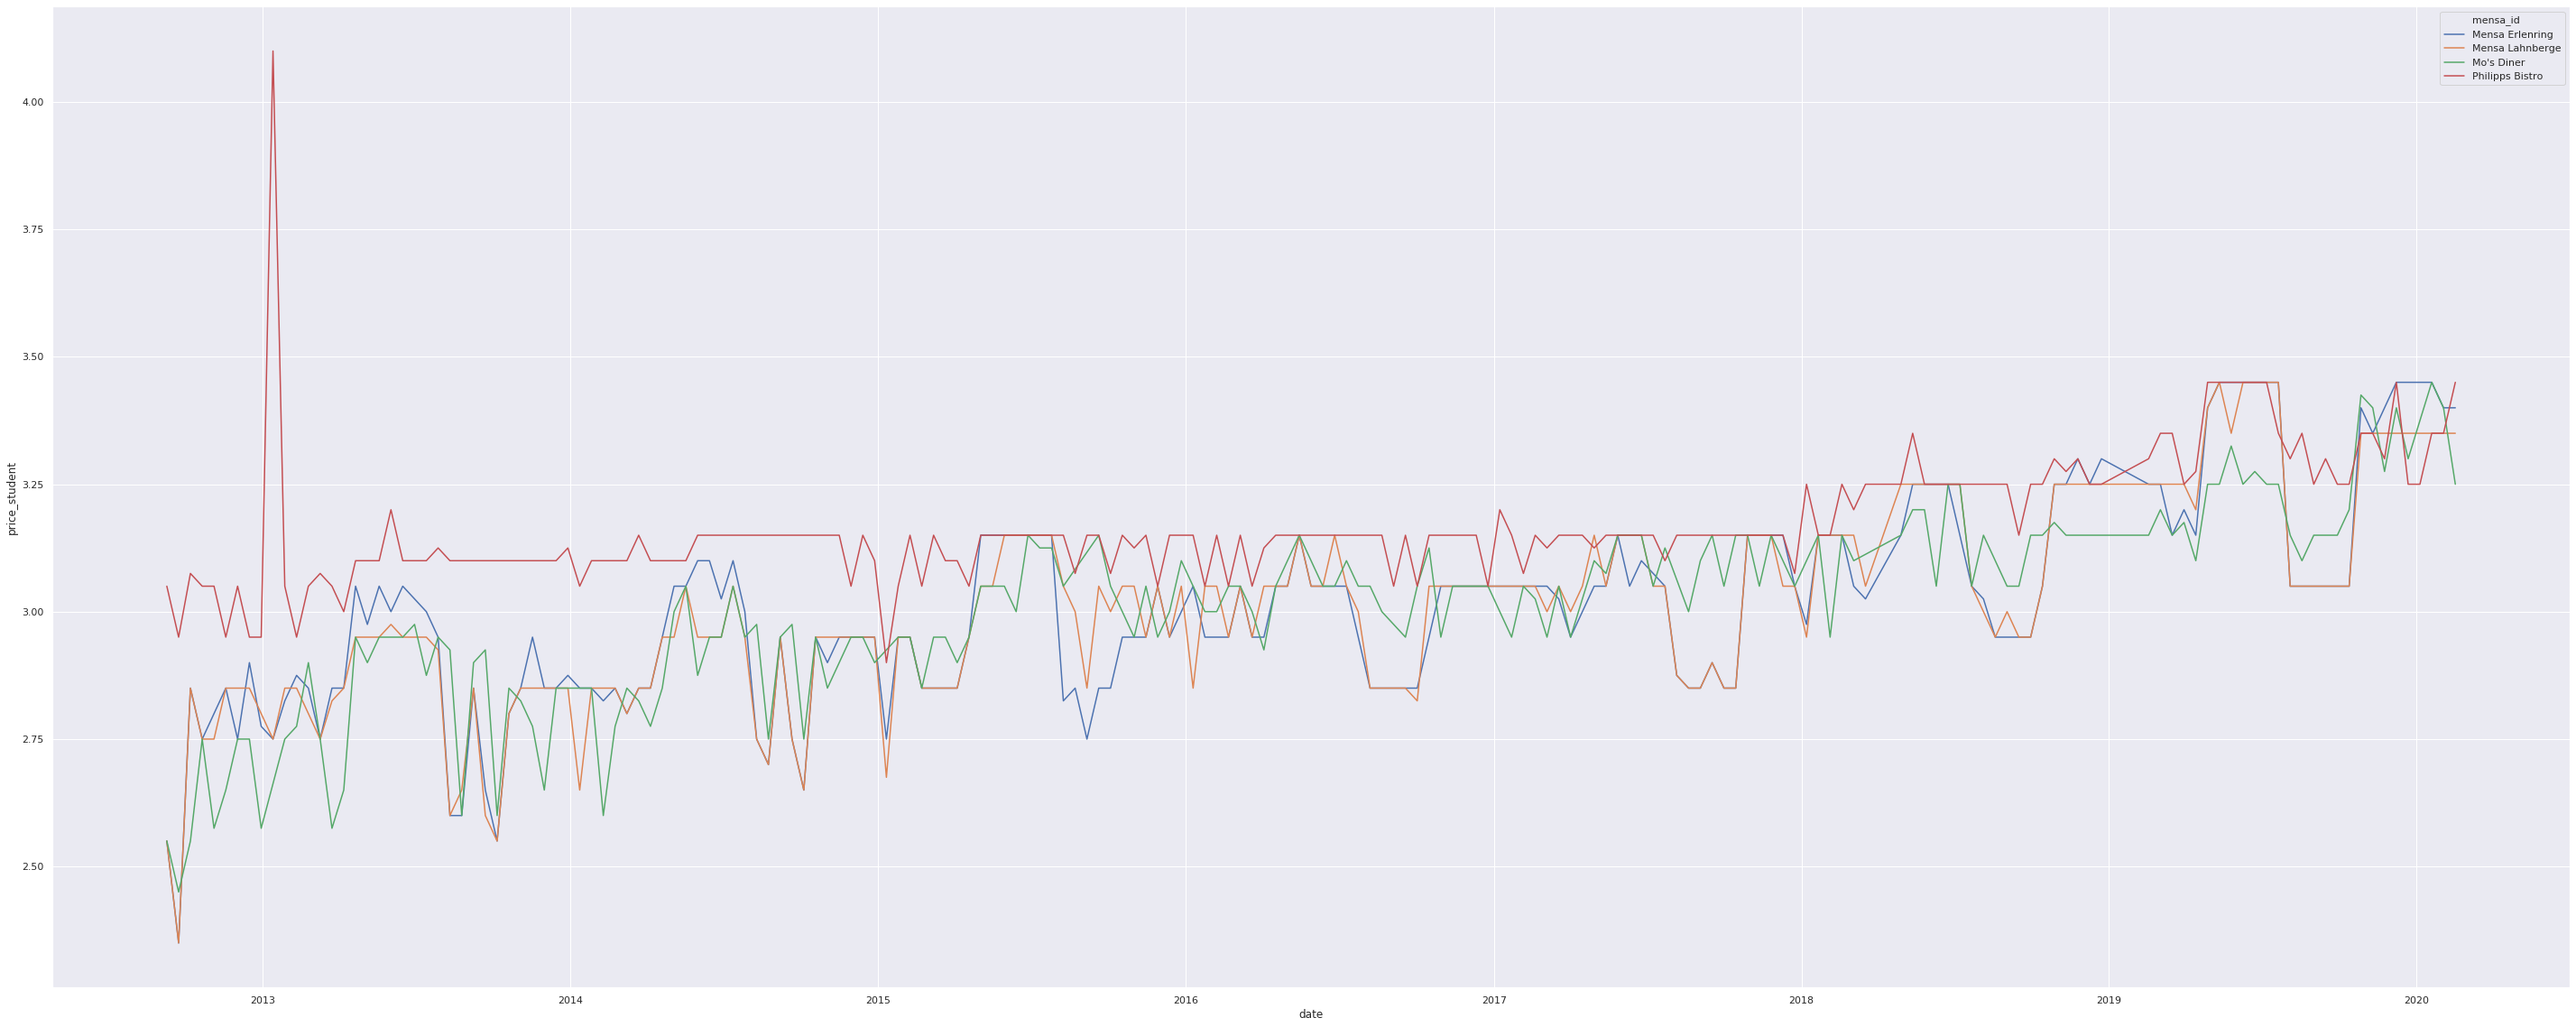

In [35]:
# ignore elements without a price and the golden Hetax-Käse for EUR 295
meals_mensa = meals[~(meals.price_student.isnull()) & (meals.price_student < 10)].groupby(
    ["mensa_id", pd.Grouper(key="date", freq="2W")])["price_student"].median().reset_index()

plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_student", hue="mensa_id", data=meals_mensa)